In [1]:
import pandas as pd
import kagglehub
path = kagglehub.dataset_download("prachi13/customer-analytics")

print("Path to dataset files:", path)

100%|██████████| 121k/121k [00:00<00:00, 24.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/prachi13/customer-analytics/versions/1


In [2]:

import kagglehub
from kagglehub import KaggleDatasetAdapter

a= kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "prachi13/customer-analytics",
    "Train.csv",
)
print(a.head())

Using Colab cache for faster access to the 'customer-analytics' dataset.
   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_

In [3]:
on_time_rates = a.groupby('Mode_of_Shipment')['Reached.on.Time_Y.N'].mean().sort_values(ascending=False)
print(on_time_rates)

Mode_of_Shipment
Flight    0.601576
Ship      0.597561
Road      0.588068
Name: Reached.on.Time_Y.N, dtype: float64


In [4]:
rating_vs_calls = a.groupby('Customer_care_calls')['Customer_rating'].mean()
print(rating_vs_calls)

Customer_care_calls
2    3.017241
3    2.959901
4    2.998032
5    2.972938
6    3.083909
7    2.995935
Name: Customer_rating, dtype: float64


In [5]:
correlation = a['Weight_in_gms'].corr(a['Discount_offered'])
print(f"Correlation between Weight and Discount: {correlation}")

Correlation between Weight and Discount: -0.37606671513805257


In [6]:
late_shipment_rate = 1 - a.groupby('Warehouse_block')['Reached.on.Time_Y.N'].mean()
print(late_shipment_rate.sort_values(ascending=False))

Warehouse_block
A    0.413530
C    0.403164
D    0.402399
F    0.401528
B    0.397709
Name: Reached.on.Time_Y.N, dtype: float64


In [7]:
a['High_Discount'] = a['Discount_offered'] > 10

discount_effect = a.groupby('High_Discount')['Reached.on.Time_Y.N'].mean()
print(discount_effect)

High_Discount
False    0.46887
True     1.00000
Name: Reached.on.Time_Y.N, dtype: float64


In [8]:
loyalty_service_level = a.groupby('Prior_purchases')['Reached.on.Time_Y.N'].mean().sort_index()
print(loyalty_service_level)


Prior_purchases
2     0.625240
3     0.640708
4     0.543387
5     0.498834
6     0.559715
7     0.676471
8     0.648438
10    0.573034
Name: Reached.on.Time_Y.N, dtype: float64


In [9]:
p = a.groupby('Gender').agg(
    Average_Cost=('Cost_of_the_Product', 'mean'),
    Average_Discount=('Discount_offered', 'mean')
)
print(p)

        Average_Cost  Average_Discount
Gender                                
F         209.255005         13.562489
M         211.154382         13.180785


In [10]:
s = [0, 2000, 5000, float('inf')]
l = ['Light (<2kg)', 'Medium (2-5kg)', 'Heavy (>5kg)']
a['Weight_Category'] = pd.cut(a['Weight_in_gms'], bins=s, labels=l, right=False)

w= a.groupby('Weight_Category')['Reached.on.Time_Y.N'].mean()
print(w)

Weight_Category
Light (<2kg)      0.677877
Medium (2-5kg)    0.643709
Heavy (>5kg)      0.426745
Name: Reached.on.Time_Y.N, dtype: float64


/tmp/ipython-input-1460555506.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  w= a.groupby('Weight_Category')['Reached.on.Time_Y.N'].mean()


In [11]:
a['Cost_Quartile'] = pd.qcut(a['Cost_of_the_Product'], q=4, labels=['Q1_Lowest', 'Q2', 'Q3', 'Q4_Highest'])

value_priority = a.groupby('Cost_Quartile')['Reached.on.Time_Y.N'].mean()
print(value_priority)

Cost_Quartile
Q1_Lowest     0.643402
Q2            0.611534
Q3            0.575465
Q4_Highest    0.555844
Name: Reached.on.Time_Y.N, dtype: float64


/tmp/ipython-input-605818425.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  value_priority = a.groupby('Cost_Quartile')['Reached.on.Time_Y.N'].mean()


Average customer rating per

In [12]:
a.groupby(['Warehouse_block', 'Mode_of_Shipment'])['Cost_of_the_Product'].mean()

Warehouse_block  Mode_of_Shipment
A                Flight              210.037037
                 Road                207.268707
                 Ship                208.818841
B                Flight              210.945946
                 Road                213.312925
                 Ship                212.175382
C                Flight              210.532203
                 Road                210.938776
                 Ship                211.407556
D                Flight              210.703704
                 Road                209.116438
                 Ship                211.376707
F                Flight              206.809122
                 Road                211.105802
                 Ship                209.139068
Name: Cost_of_the_Product, dtype: float64

In [13]:
a["Reached.on.Time_Y.N"].value_counts()

,count
Reached.on.Time_Y.N,
1,6563
0,4436


In [14]:
a.nlargest(5,"Weight_in_gms").head(5)["ID"]

,ID
199,200
245,246
198,199
205,206
213,214


In [15]:
a.groupby("Product_importance").size()
a['Product_importance'].value_counts()

,count
Product_importance,
low,5297
medium,4754
high,948


In [16]:
A=a.groupby("Gender")['Discount_offered'].mean()
A.sort_values(ascending=False).head(1)

,Discount_offered
Gender,
F,13.562489


In [17]:
b=a.groupby(['Product_importance','Warehouse_block'])['Cost_of_the_Product'].mean()
print(b)

Product_importance  Warehouse_block
high                A                  204.357576
                    B                  199.390411
                    C                  198.803571
                    D                  212.222892
                    F                  204.000000
low                 A                  209.801980
                    B                  214.409357
                    C                  214.636156
                    D                  211.915062
                    F                  210.888514
medium              A                  208.487484
                    B                  212.087740
                    C                  210.016435
                    D                  209.496815
                    F                  208.019534
Name: Cost_of_the_Product, dtype: float64


In [18]:
a.groupby('Customer_rating')['Reached.on.Time_Y.N'].mean()*10000

,Reached.on.Time_Y.N
Customer_rating,
1,5874.720358
2,5879.907621
3,6060.741402
4,5952.489721
5,6066.328881


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Cost_of_the_Product', ylabel='Count'>

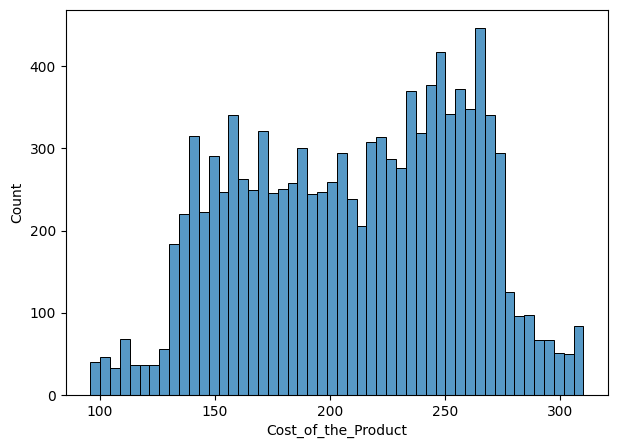

In [20]:
plt.figure(figsize=(7,5))
sns.histplot(a['Cost_of_the_Product'],bins=50)

<Axes: xlabel='Cost_of_the_Product', ylabel='Count'>

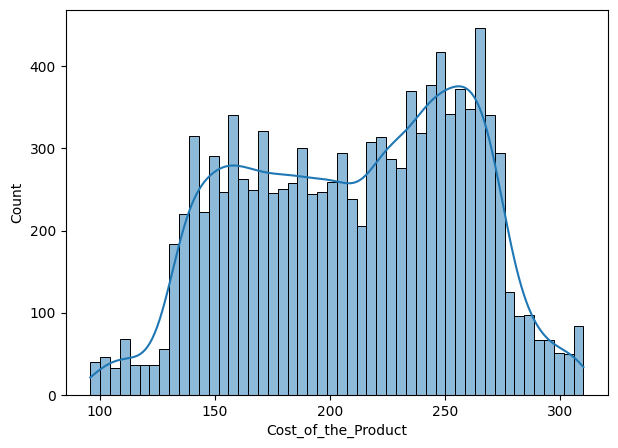

In [21]:
plt.figure(figsize=(7,5))
sns.histplot(a['Cost_of_the_Product'],bins=50,kde=True)

<Axes: xlabel='Mode_of_Shipment', ylabel='count'>

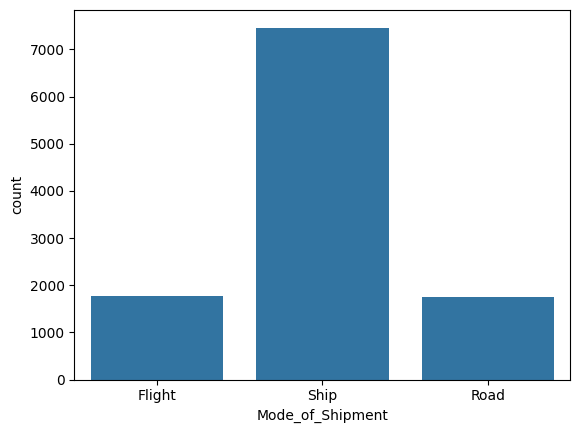

In [22]:
sns.countplot(x='Mode_of_Shipment',data=a)

<Axes: ylabel='Mode_of_Shipment'>

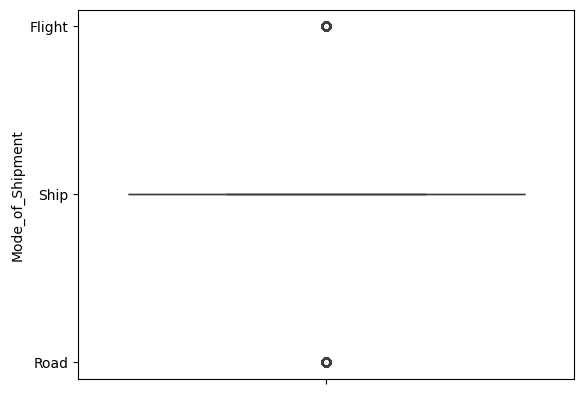

In [23]:
sns.boxplot(data=a['Mode_of_Shipment'])

<Axes: xlabel='Cost_of_the_Product'>

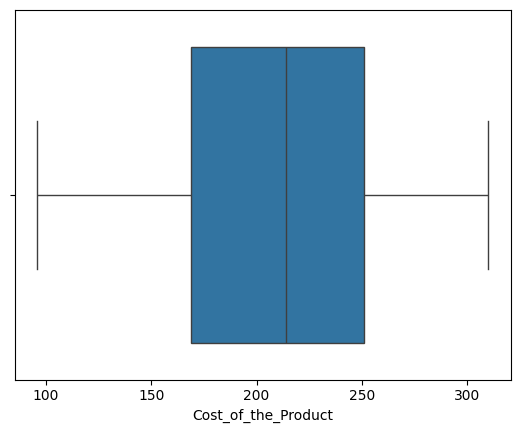

In [24]:
sns.boxplot(x='Cost_of_the_Product',data=a)

<Axes: xlabel='Cost_of_the_Product'>

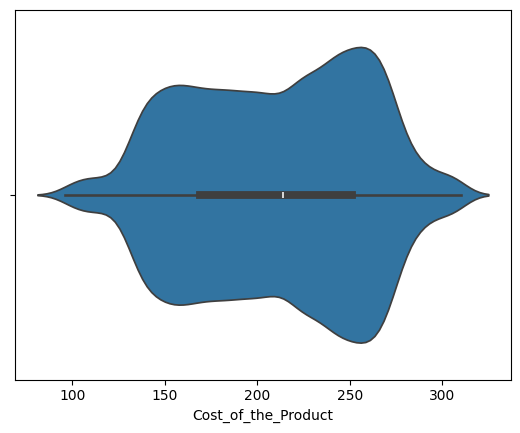

In [25]:
sns.violinplot(x='Cost_of_the_Product',data=a)

<Axes: xlabel='Prior_purchases', ylabel='Cost_of_the_Product'>

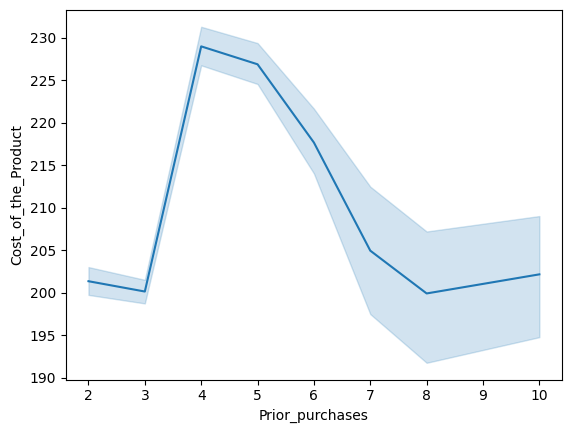

In [26]:
sns.lineplot(x='Prior_purchases',y='Cost_of_the_Product',data=a)

In [27]:
a['Prior_purchases']


,Prior_purchases
0,3
1,2
2,4
3,4
4,3
...,...
10994,5
10995,5
10996,5
10997,6


<Axes: xlabel='Weight_in_gms', ylabel='Cost_of_the_Product'>

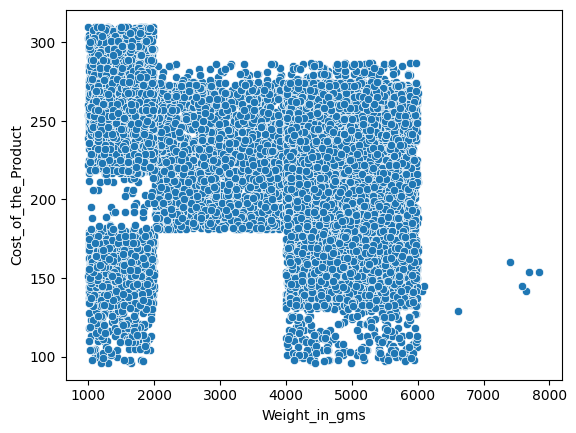

In [28]:
sns.scatterplot(x='Weight_in_gms',y='Cost_of_the_Product',data=a)


<Axes: xlabel='Weight_in_gms', ylabel='Cost_of_the_Product'>

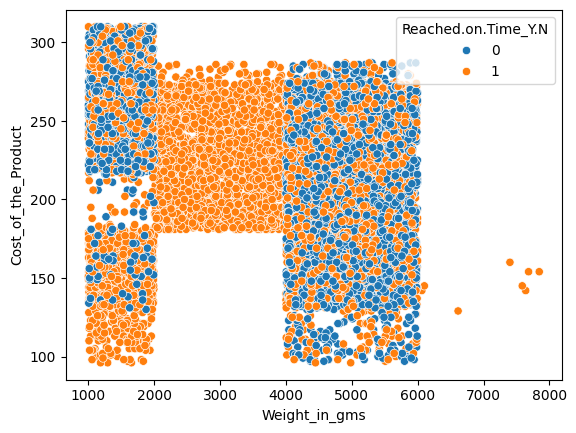

In [29]:
sns.scatterplot(x='Weight_in_gms',y='Cost_of_the_Product',data=a,hue='Reached.on.Time_Y.N')


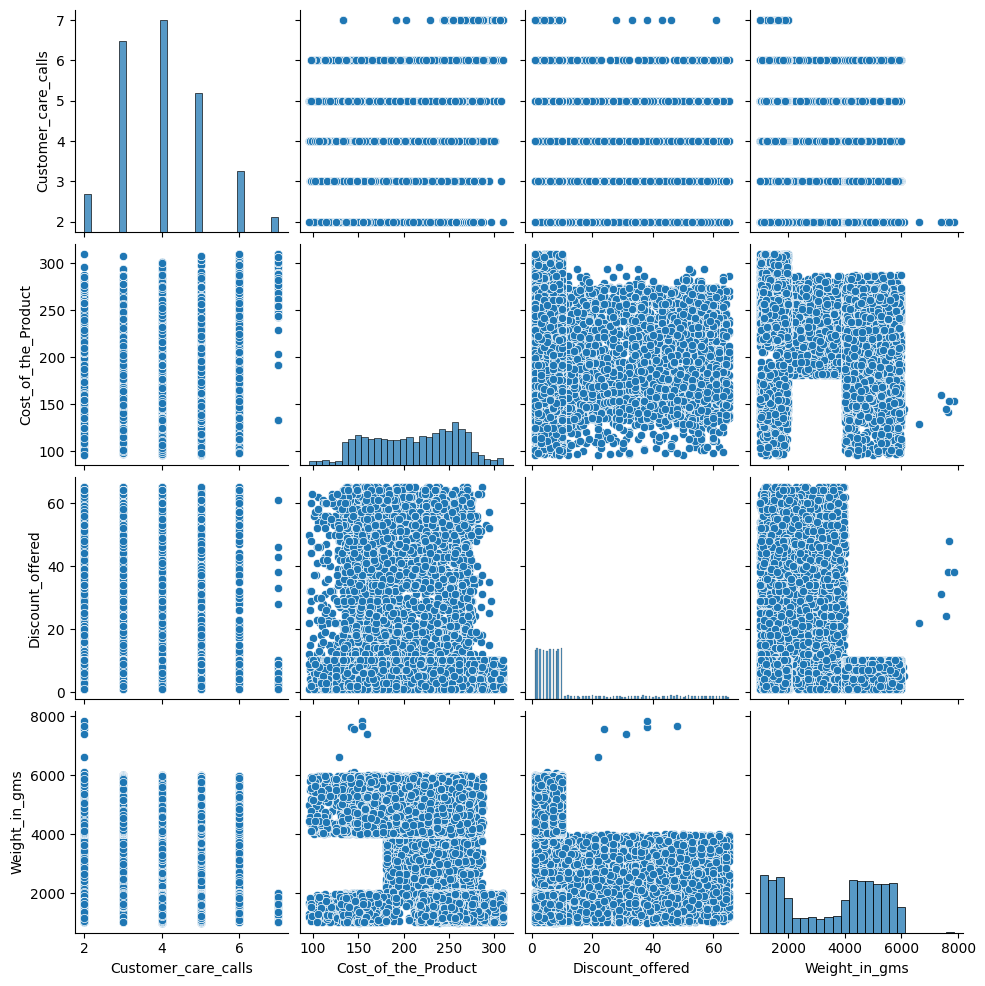

In [30]:
n_col=['Customer_care_calls','Cost_of_the_Product','Discount_offered','Weight_in_gms']
sns.pairplot(a[n_col])

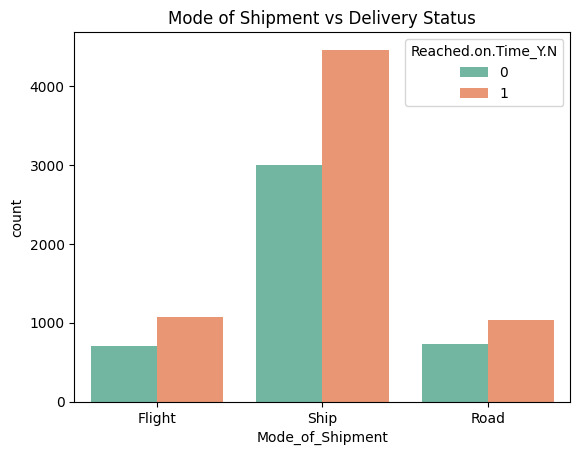

In [32]:
sns.countplot(x="Mode_of_Shipment", hue="Reached.on.Time_Y.N", data=a, palette="Set2")
plt.title("Mode of Shipment vs Delivery Status")
plt.show()

In [35]:
corr_matrix = a.corr(numeric_only=True)

for i in range(len(corr_matrix.columns)):
    for j in range(i):

        # Print variables with high correlation
        if abs(corr_matrix.iloc[i, j]) > 0.5:
            print(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])

Discount_offered ID -0.5982780149556365
High_Discount ID -0.6974049409466407
High_Discount Discount_offered 0.8622316171605465


In [38]:
'''Standardization'''
'''z score'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_standardized = a.copy()
numeric_cols = a.select_dtypes(include=['number']).columns
df_standardized[numeric_cols] = scaler.fit_transform(a[numeric_cols])
print(df_standardized[numeric_cols].head())

         ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
0 -1.731893            -0.047711        -0.700755            -0.690722   
1 -1.731578            -0.047711         1.421578             0.120746   
2 -1.731263            -1.799887        -0.700755            -0.565881   
3 -1.730949            -0.923799         0.006689            -0.711529   
4 -1.730634            -1.799887        -0.700755            -0.545074   

   Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0        -0.372735          1.889983      -1.468240             0.822138  
1        -1.029424          2.815636      -0.333893             0.822138  
2         0.283954          2.136824      -0.159002             0.822138  
3         0.283954         -0.208162      -1.502484             0.822138  
4        -0.372735          2.013404      -0.703244             0.822138  


In [40]:
t = "Reached.on.Time_Y.N"
numeric_cols = a.select_dtypes(include=['int64','float64']).columns

# Compute correlation with target
corr = a[numeric_cols].corr()[t].sort_values(ascending=False)
print("Correlation with target:\n", corr)

Correlation with target:
 Reached.on.Time_Y.N    1.000000
Discount_offered       0.397108
Customer_rating        0.013119
Prior_purchases       -0.055515
Customer_care_calls   -0.067126
Cost_of_the_Product   -0.073587
Weight_in_gms         -0.268793
ID                    -0.411822
Name: Reached.on.Time_Y.N, dtype: float64


In [43]:
'''Rating_Binary'''
a["Rating_Binary"] = (a["Customer_rating"] >= 4).astype(int)
a["Rating_Binary"]
'''Interaction_to_Rating_Ratio'''
a["Interaction_to_Rating_Ratio"] = a["Customer_care_calls"] / (a["Customer_rating"] + 1)
a["Interaction_to_Rating_Ratio"]
'''Cost_per_Gram'''
a["Cost_per_Gram"] = a["Cost_of_the_Product"] / a["Weight_in_gms"]
a["Cost_per_Gram"]
a["Adjusted_Cost"] = a["Cost_of_the_Product"] - a["Discount_offered"]
a["Adjusted_Cost"]
#Complaint-to-Purchase Ratio
a["Complaint_to_Purchase_Ratio"] = a["Customer_care_calls"] / (a["Prior_purchases"] + 1)
a["Complaint_to_Purchase_Ratio"].astype(int)

,Complaint_to_Purchase_Ratio
0,1
1,1
2,0
3,0
4,0
...,...
10994,0
10995,0
10996,0
10997,0


In [44]:
a

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,High_Discount,Weight_Category,Cost_Quartile,Rating_Binary,Interaction_to_Rating_Ratio,Cost_per_Gram,Adjusted_Cost,Complaint_to_Purchase_Ratio
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,True,Light (<2kg),Q2,0,1.333333,0.143552,133,1.000000
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,True,Medium (2-5kg),Q3,1,0.666667,0.069948,157,1.333333
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,True,Medium (2-5kg),Q2,0,0.666667,0.054238,135,0.400000
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,False,Light (<2kg),Q2,0,0.750000,0.149533,166,0.600000
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,True,Medium (2-5kg),Q2,0,0.666667,0.074074,138,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1,False,Light (<2kg),Q4_Highest,0,2.000000,0.163849,251,0.666667
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0,False,Light (<2kg),Q3,0,2.000000,0.186047,226,0.666667
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0,False,Light (<2kg),Q3,1,1.000000,0.209524,238,0.833333
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0,False,Light (<2kg),Q3,0,1.666667,0.184298,221,0.714286


In [46]:
'''Encoding'''

df_onehot = pd.get_dummies(a, columns=["Mode_of_Shipment"], drop_first=True)

df_onehot.head()

,ID,Warehouse_block,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,...,High_Discount,Weight_Category,Cost_Quartile,Rating_Binary,Interaction_to_Rating_Ratio,Cost_per_Gram,Adjusted_Cost,Complaint_to_Purchase_Ratio,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,1,D,4,2,177,3,low,F,44,1233,...,True,Light (<2kg),Q2,0,1.333333,0.143552,133,1.000000,False,False
1,2,F,4,5,216,2,low,M,59,3088,...,True,Medium (2-5kg),Q3,1,0.666667,0.069948,157,1.333333,False,False
2,3,A,2,2,183,4,low,M,48,3374,...,True,Medium (2-5kg),Q2,0,0.666667,0.054238,135,0.400000,False,False
3,4,B,3,3,176,4,medium,M,10,1177,...,False,Light (<2kg),Q2,0,0.750000,0.149533,166,0.600000,False,False
4,5,C,2,2,184,3,medium,F,46,2484,...,True,Medium (2-5kg),Q2,0,0.666667,0.074074,138,0.500000,False,False


In [48]:
'''target encoding'''
df_target = a.copy()

target_mean = df_target.groupby("Gender")["Reached.on.Time_Y.N"].mean()
df_target["Gender_Target_Encoded"] = df_target["Gender"].map(target_mean)

print(df_target[["Gender", "Gender_Target_Encoded"]].head())

  Gender  Gender_Target_Encoded
0      F               0.594409
1      M               0.599010
2      M               0.599010
3      M               0.599010
4      F               0.594409


In [50]:
'''nominal encoding'''
from sklearn.preprocessing import LabelEncoder

df_nominal = a.copy()
le = LabelEncoder()
df_nominal["Warehouse_block"] = le.fit_transform(df_nominal["Warehouse_block"])

print(df_nominal[["Warehouse_block"]].head())

   Warehouse_block
0                3
1                4
2                0
3                1
4                2


In [54]:
'''SVM'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Encoding categorical columns
categorical_cols = ["Warehouse_block", "Mode_of_Shipment", "Product_importance", "Gender"]
le = LabelEncoder()
for col in categorical_cols:
    a[col] = le.fit_transform(a[col])

# Features & target
X = a.drop(columns=["ID", "Reached.on.Time_Y.N", "Weight_Category", "Cost_Quartile", "Rating_Binary", "Interaction_to_Rating_Ratio", "Cost_per_Gram", "Adjusted_Cost", "Complaint_to_Purchase_Ratio"])
y = a["Reached.on.Time_Y.N"]

# Standardize continuous features for SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# SVM model with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



'''linear regression'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# Features & Target
X = a.drop(columns=["ID", "Reached.on.Time_Y.N", "Weight_Category", "Cost_Quartile", "Rating_Binary", "Interaction_to_Rating_Ratio", "Cost_per_Gram", "Adjusted_Cost", "Complaint_to_Purchase_Ratio"])
y = a["Reached.on.Time_Y.N"]

# Categorical columns
categorical_cols = ["Warehouse_block", "Mode_of_Shipment", "Product_importance", "Gender"]

# Encoding
ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(drop="first"), categorical_cols)],
    remainder="passthrough"
)

X_encoded = ct.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred = lin_reg.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)





'''naive bayes '''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Encode categorical columns
categorical_cols = ["Warehouse_block", "Mode_of_Shipment", "Product_importance", "Gender"]
le = LabelEncoder()
for col in categorical_cols:
    a[col] = le.fit_transform(a[col])

# Features & target
X = a.drop(columns=["ID", "Reached.on.Time_Y.N", "Weight_Category", "Cost_Quartile", "Rating_Binary", "Interaction_to_Rating_Ratio", "Cost_per_Gram", "Adjusted_Cost", "Complaint_to_Purchase_Ratio"])
y = a["Reached.on.Time_Y.N"]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Naive Bayes Model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_pred = nb.predict(X_test)

# Evaluation
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6654545454545454

 Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.90      0.68       887
           1       0.88      0.51      0.64      1313

    accuracy                           0.67      2200
   macro avg       0.72      0.70      0.66      2200
weighted avg       0.75      0.67      0.66      2200


 Confusion Matrix:
 [[797  90]
 [646 667]]
Mean Squared Error: 0.18812951457411553
R² Score: 0.21816708421919118
 Accuracy: 0.64

 Classification Report:
               precision    recall  f1-score   support

           0       0.53      1.00      0.69       887
           1       1.00      0.40      0.57      1313

    accuracy                           0.64      2200
   macro avg       0.76      0.70      0.63      2200
weighted avg       0.81      0.64      0.62      2200


 Confusion Matrix:
 [[887   0]
 [792 521]]
